### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Retrieve Returns Time-Series

In [2]:
macro = pd.read_csv('macro_momentum_return.csv', index_col=0, parse_dates=True)
macro.columns = ['Macro']

equity = pd.read_csv('index_timing_return.csv', index_col=0, parse_dates=True)
equity.columns = ['Equity']

#signal = pd.read_csv('index_timing.csv', index_col=0, parse_dates=True)

### Compute Overall Return

In [3]:
combined = pd.concat([macro, equity], axis=1)
combined.fillna(method='pad', inplace=True)
combined = combined.loc['2005':]
combined.fillna(0, inplace=True)

### Backtest Strategy

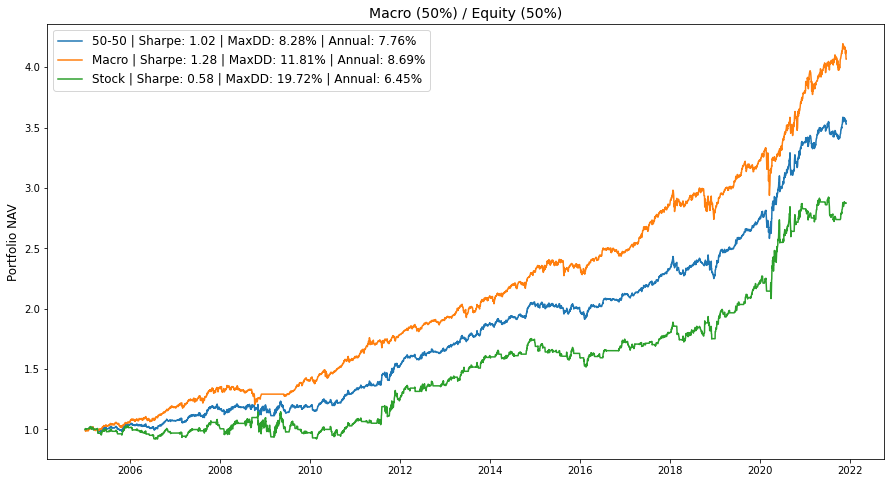

In [4]:
# calculate daily portfolio return
macro_alloc = 50
equity_alloc = 100 - macro_alloc
strat = (combined * [macro_alloc/100, equity_alloc/100]).sum(axis=1)
macro = combined['Macro']
equity = combined['Equity']

# functionalize Sharpe ratio
def sharpe(daily_return):
    return daily_return.mean() / daily_return.std() * np.sqrt(250)

# functionalize maximum drawdown
def max_dd(daily_return):
    roll_max = (daily_return + 1).cumprod().expanding().max()
    daily_dd = (daily_return + 1).cumprod() / roll_max.values - 1.0
    max_dd = daily_dd.abs().max() * 100
    return max_dd

# functionalize annualized return
def annualized_return(daily_return):
    cum_return = (daily_return + 1).cumprod().dropna()
    ann_return = (cum_return.iloc[-1] / cum_return.iloc[0]) ** (1 / len(cum_return) * 252) - 1
    ann_return = ann_return * 100
    return ann_return

# plot PnL
plt.figure(figsize=(15,8))
plt.plot((strat + 1).cumprod(), label=f"50-50 | Sharpe: {sharpe(strat):.2f} | MaxDD: {max_dd(strat):.2f}% | Annual: {annualized_return(strat):.2f}%")
plt.plot((macro + 1).cumprod(), label=f"Macro | Sharpe: {sharpe(macro):.2f} | MaxDD: {max_dd(macro):.2f}% | Annual: {annualized_return(macro):.2f}%")
plt.plot((equity + 1).cumprod(), label=f"Stock | Sharpe: {sharpe(equity):.2f} | MaxDD: {max_dd(equity):.2f}% | Annual: {annualized_return(equity):.2f}%")

plt.title(f"Macro ({macro_alloc}%) / Equity ({equity_alloc}%)", fontsize=14)
plt.ylabel('Portfolio NAV', fontsize=12)
plt.legend(fontsize=12)
plt.show()

## The End